In [1]:
%run 02_User_Defined_Functions.ipynb

In [2]:
# Calling school retention rate function
df_cleaned = calculate_school_retention_percentage(df_cleaned)

# Removing extreme outliers from columns
df_cleaned = remove_outliers(df_cleaned)

### Univariate Analysis

##### Categorical Variables

In [3]:
# Categorical school factors 
categorical_cols = ['CHARTER','MAGNET','STITLEI','VIRTUAL','SCHOOL_LEVEL','LOCAL_CATEGORY']

# Ignoring missing or not available values 
filter_val = ['M','N','Other','Secondary','Not Applicable','Virtual with face to face options']

# Creating temp dataframe for categorical school factors
df_non_num = df_cleaned[categorical_cols]
df_non_num_filtered = df_non_num[~df_non_num.isin(filter_val).any(axis=1)]
df_non_num_filtered.replace('nan', np.nan, inplace=True)
df_non_num_filtered.dropna(inplace=True)

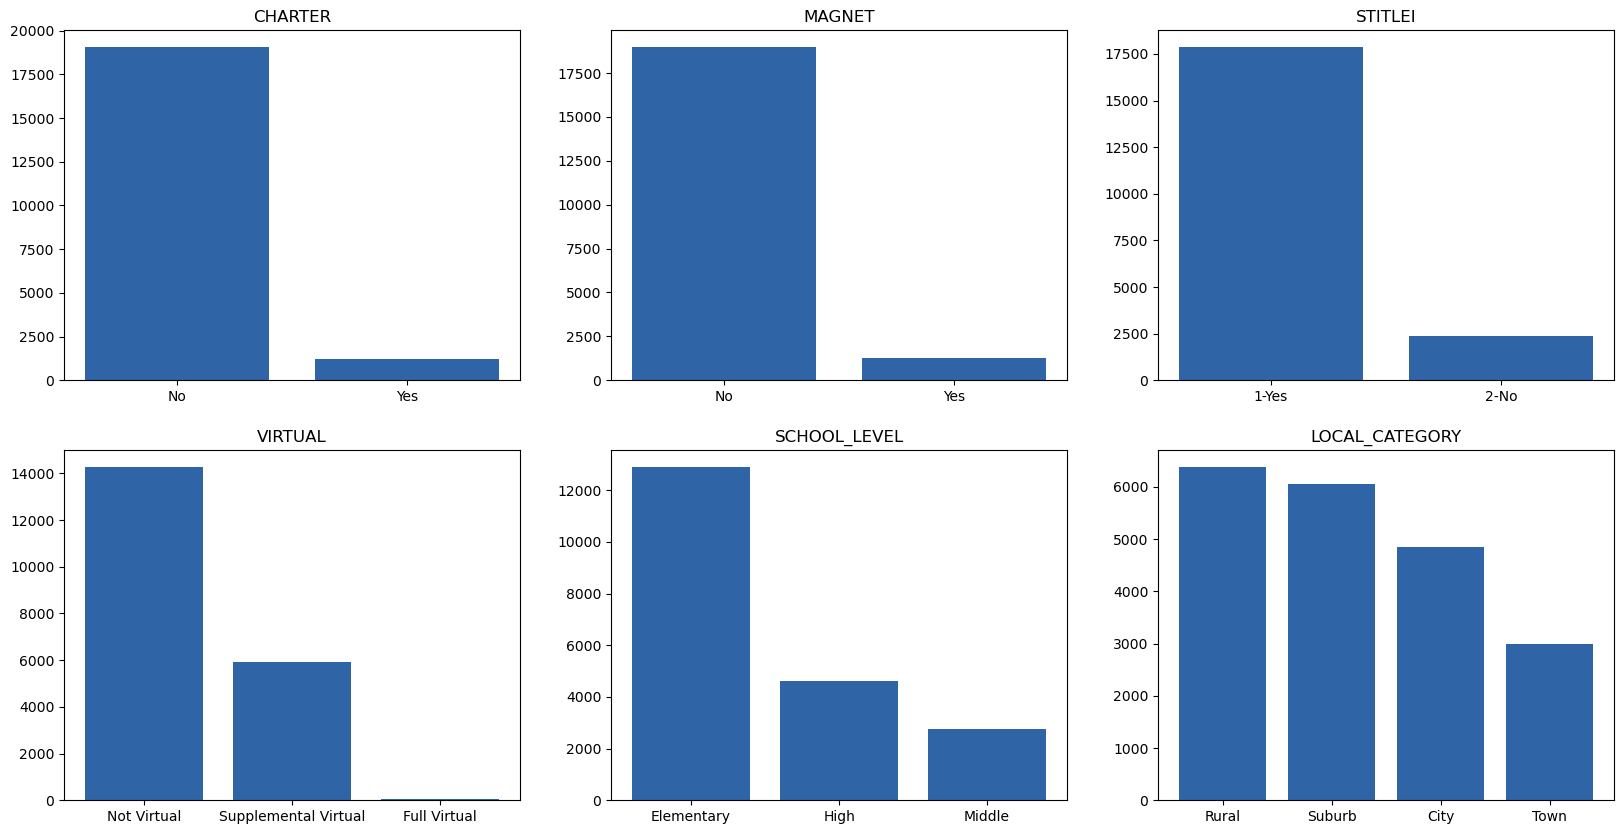

In [4]:
# Plotting the counts of each categorical school factors
fig, axs = plt.subplots(2, 3, figsize=(20,10))

for i, col in enumerate(categorical_cols):

    # plot count plot
    value_counts = df_non_num_filtered[col].value_counts()
    
    axs[i // 3, i % 3].bar(value_counts.index, value_counts.values)
    axs[i // 3, i % 3].set_title(col)
    axs[i // 3, i % 3].tick_params(axis='x')

plt.show()    

From above count plots it can be seen:
Charter: Majority of schools are not charter schools
Magnet: Majority of schools are not magnet schools
Stitle1: Majority of schools are Title 1 eligible
Virtual: Majority of schools are not virtual
School level: There are more elementary schools than middle and high schools
Local Category: Most of the schools are in rural, suburb and city areas.

##### Numeric Variables

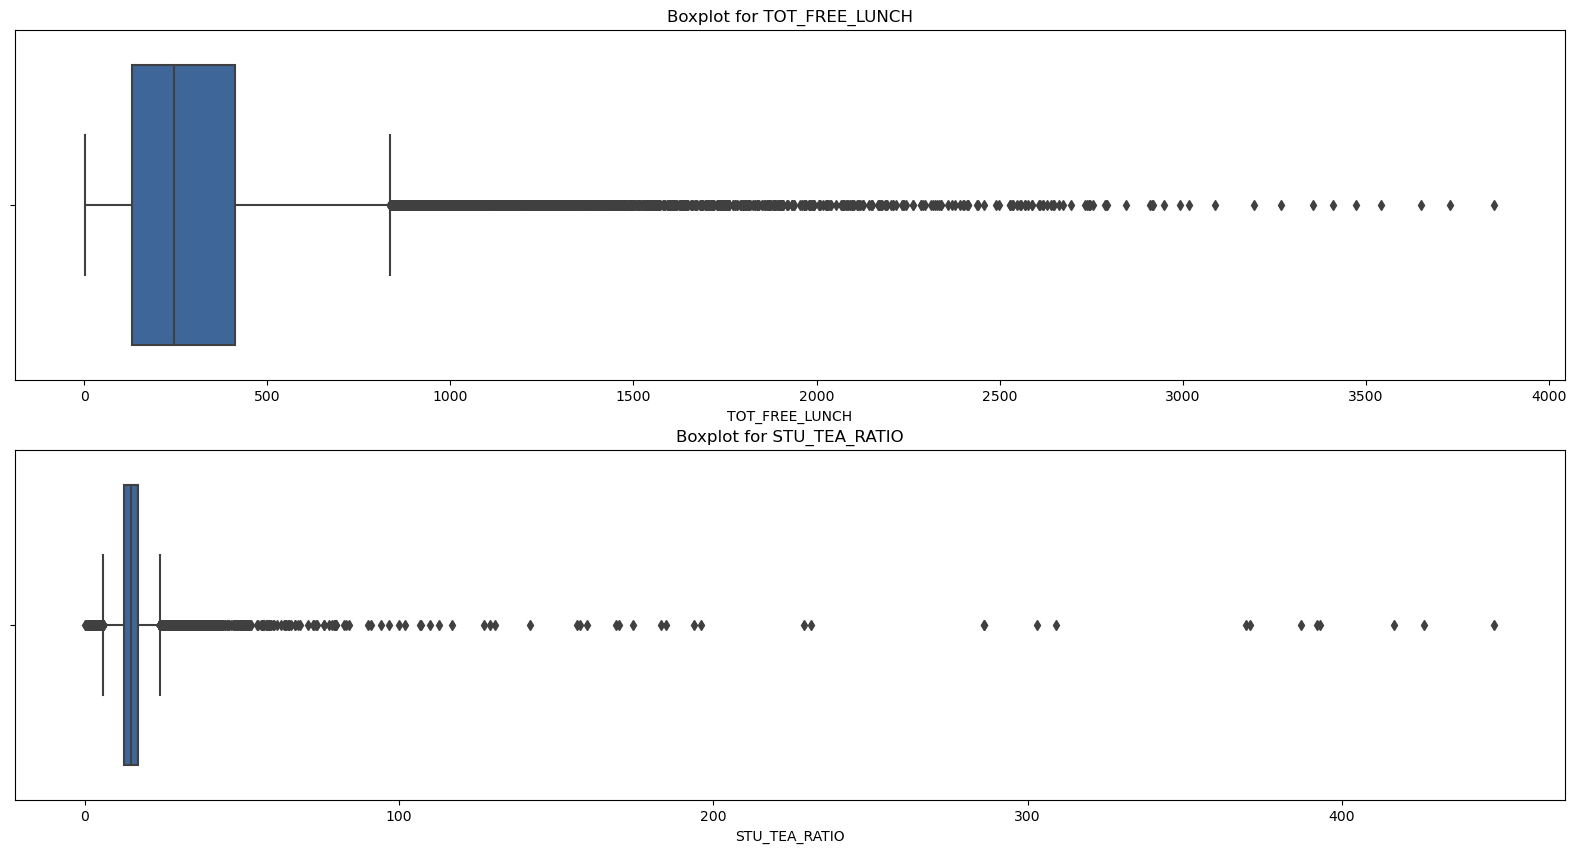

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

# Boxplot for TOT_FREE_LUNCH
sns.boxplot(x=df_cleaned['TOT_FREE_LUNCH'], ax=axes[0])
axes[0].set_title('Boxplot for TOT_FREE_LUNCH')

# Boxplot for STU_TEA_RATIO
sns.boxplot(x=df_cleaned['STU_TEA_RATIO'], ax=axes[1])
axes[1].set_title('Boxplot for STU_TEA_RATIO')

# Show the plots
plt.show()

Positively skewed data

Using Interquartile Range method to detect outliers in some columns

In [6]:
# Calculate the IQR for TOT_FREE_LUNCH and STU_TEA_RATIO
Q1_lunch = df_cleaned['TOT_FREE_LUNCH'].quantile(0.25)
Q3_lunch = df_cleaned['TOT_FREE_LUNCH'].quantile(0.75)
IQR_lunch = Q3_lunch - Q1_lunch

Q1_ratio = df_cleaned['STU_TEA_RATIO'].quantile(0.25)
Q3_ratio = df_cleaned['STU_TEA_RATIO'].quantile(0.75)
IQR_ratio = Q3_ratio - Q1_ratio

# Define thresholds for considering values as outliers
lower_threshold_lunch = Q1_lunch - 1.5 * IQR_lunch
upper_threshold_lunch = Q3_lunch + 1.5 * IQR_lunch

lower_threshold_ratio = Q1_ratio - 1.5 * IQR_ratio
upper_threshold_ratio = Q3_ratio + 1.5 * IQR_ratio

# Identify outliers
outliers_lunch_iqr = df_cleaned[(df_cleaned['TOT_FREE_LUNCH'] < lower_threshold_lunch) | (df_cleaned['TOT_FREE_LUNCH'] > upper_threshold_lunch)]
outliers_ratio_iqr = df_cleaned[(df_cleaned['STU_TEA_RATIO'] < lower_threshold_ratio) | (df_cleaned['STU_TEA_RATIO'] > upper_threshold_ratio)]

print("Number of outliers based on IQR for TOT_FREE_LUNCH:")
print(outliers_lunch_iqr.shape[0])
print("\nNumber of outliers based on IQR for STU_TEA_RATIO:")
print(outliers_ratio_iqr.shape[0])

Number of outliers based on IQR for TOT_FREE_LUNCH:
1982

Number of outliers based on IQR for STU_TEA_RATIO:
2042


In [7]:
# Calculate the IQR for Total enrollments
Q1_enroll = df_cleaned['TOT_ENROLL'].quantile(0.25)
Q3_enroll = df_cleaned['TOT_ENROLL'].quantile(0.75)
IQR_enroll = Q3_enroll - Q1_enroll

# Define thresholds for considering values as outliers
lower_threshold_enroll = Q1_enroll - 1.5 * IQR_enroll
upper_threshold_enroll = Q3_enroll + 1.5 * IQR_enroll

# Identify outliers
outliers_enroll_iqr = df_cleaned[(df_cleaned['TOT_ENROLL'] < lower_threshold_enroll) | (df_cleaned['TOT_ENROLL'] > upper_threshold_enroll)]

print("Number of outliers based on IQR for TOT_ENROLL:")
print(outliers_enroll_iqr.shape[0])

Number of outliers based on IQR for TOT_ENROLL:
3118


### Multivariate Analysis

Correlation between School Retention Count and Free Lunch Count

In [8]:
df_cleaned = calculate_gender_retention_rate(df_cleaned)

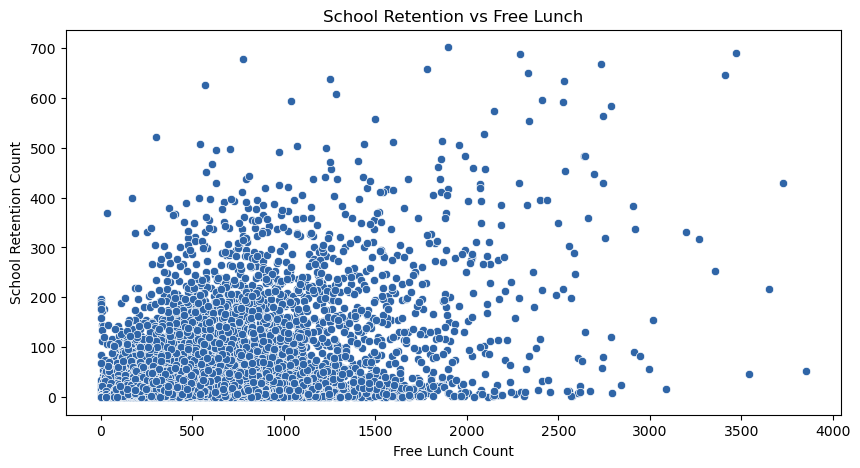

In [9]:
# Getting free lunch count and school retention count
free_lunch = df_cleaned['TOT_FREE_LUNCH']
school_retention = df_cleaned['SCH_TOT_RET']

# Creating scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=free_lunch, y=school_retention)

plt.xlabel('Free Lunch Count')
plt.ylabel('School Retention Count')
plt.title('School Retention vs Free Lunch')
plt.show()

Correlation between School Retention Count and Student Teacher Ratio Count

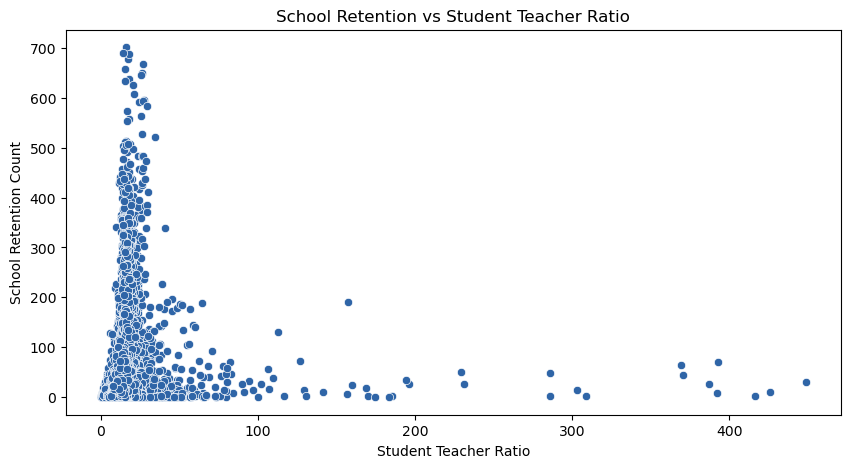

In [10]:
# Getting student teacher ratio count and school retention count
student_teacher_ratio = df_cleaned['STU_TEA_RATIO']
school_retention = df_cleaned['SCH_TOT_RET']

# Creating scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=student_teacher_ratio, y=school_retention)

plt.xlabel('Student Teacher Ratio')
plt.ylabel('School Retention Count')
plt.title('School Retention vs Student Teacher Ratio')
plt.show()

### Retention count by Limited English Proficiency

In [11]:
# Checking Limited English Proficiency retention correlation with school retention 
df_lep = df_cleaned.filter(like='LEP')
df_lep['SCH_RET_TOT'] = df_cleaned['SCH_TOT_RET']
df_lep['LOCAL_CATEGORY'] = df_cleaned['LOCAL_CATEGORY']
categories = df_lep['LOCAL_CATEGORY'].unique()
sorted_categories = sorted(categories)

df_lep_male = df_lep.filter(like='M')
df_lep_male_total = df_lep_male.sum(axis=1)

df_lep_female = df_lep.filter(like='F')
df_lep_female_total = df_lep_female.sum(axis=1)

df_lep_total = df_lep_male_total + df_lep_female_total
df_lep['LEP_TOTAL'] = df_lep_total

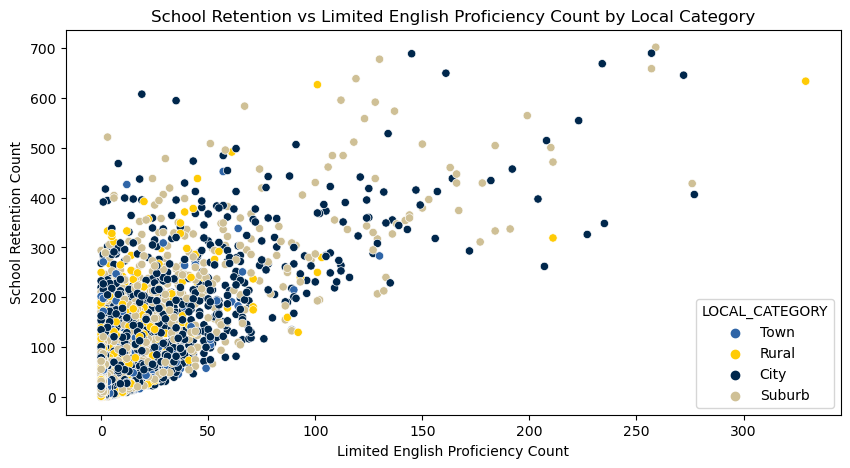

In [12]:
# Creating scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_lep['LEP_TOTAL'], y=df_lep['SCH_RET_TOT'], hue=df_lep['LOCAL_CATEGORY'])

plt.xlabel('Limited English Proficiency Count')
plt.ylabel('School Retention Count')
plt.title('School Retention vs Limited English Proficiency Count by Local Category')
plt.show()

It shows that limited proficiency retention is positively correlated with school retention

### Retention count by Disability

In [13]:
# Checking disability retention correlation with school retention 
df_disability = df_cleaned.filter(like='IDEA')
df_disability['SCH_TOT_RET'] = df_cleaned['SCH_TOT_RET']
df_disability['LOCAL_CATEGORY'] = df_cleaned['LOCAL_CATEGORY']

df_disability_male = df_disability.filter(like='M')
df_disability_male_total = df_disability_male.sum(axis=1)

df_disability_female = df_disability.filter(like='F')
df_disability_female_total = df_disability_female.sum(axis=1)

df_disability_total = df_disability_male_total + df_disability_female_total
df_disability['IDEA_TOTAL'] = df_disability_total

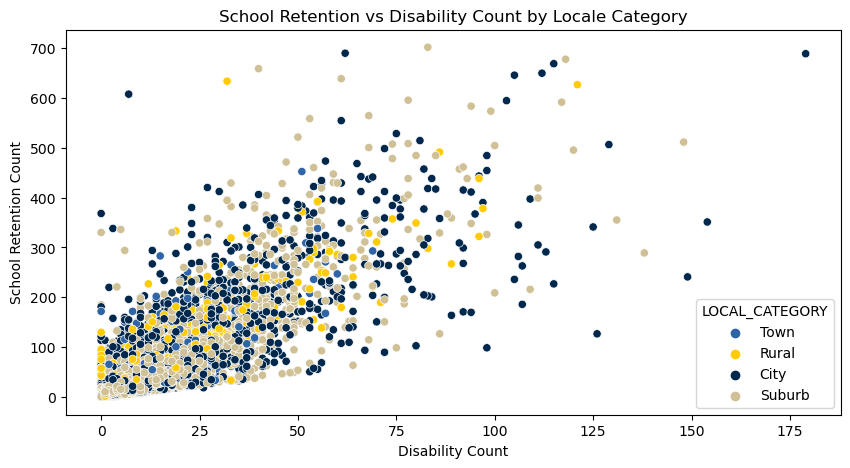

In [14]:
# Creating scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_disability['IDEA_TOTAL'], y=df_disability['SCH_TOT_RET'], hue=df_disability['LOCAL_CATEGORY'])

plt.xlabel('Disability Count')
plt.ylabel('School Retention Count')
plt.title('School Retention vs Disability Count by Locale Category')
plt.show()

It shows that disability retention is positively correlated with school retention

### Grade enrollment correlation

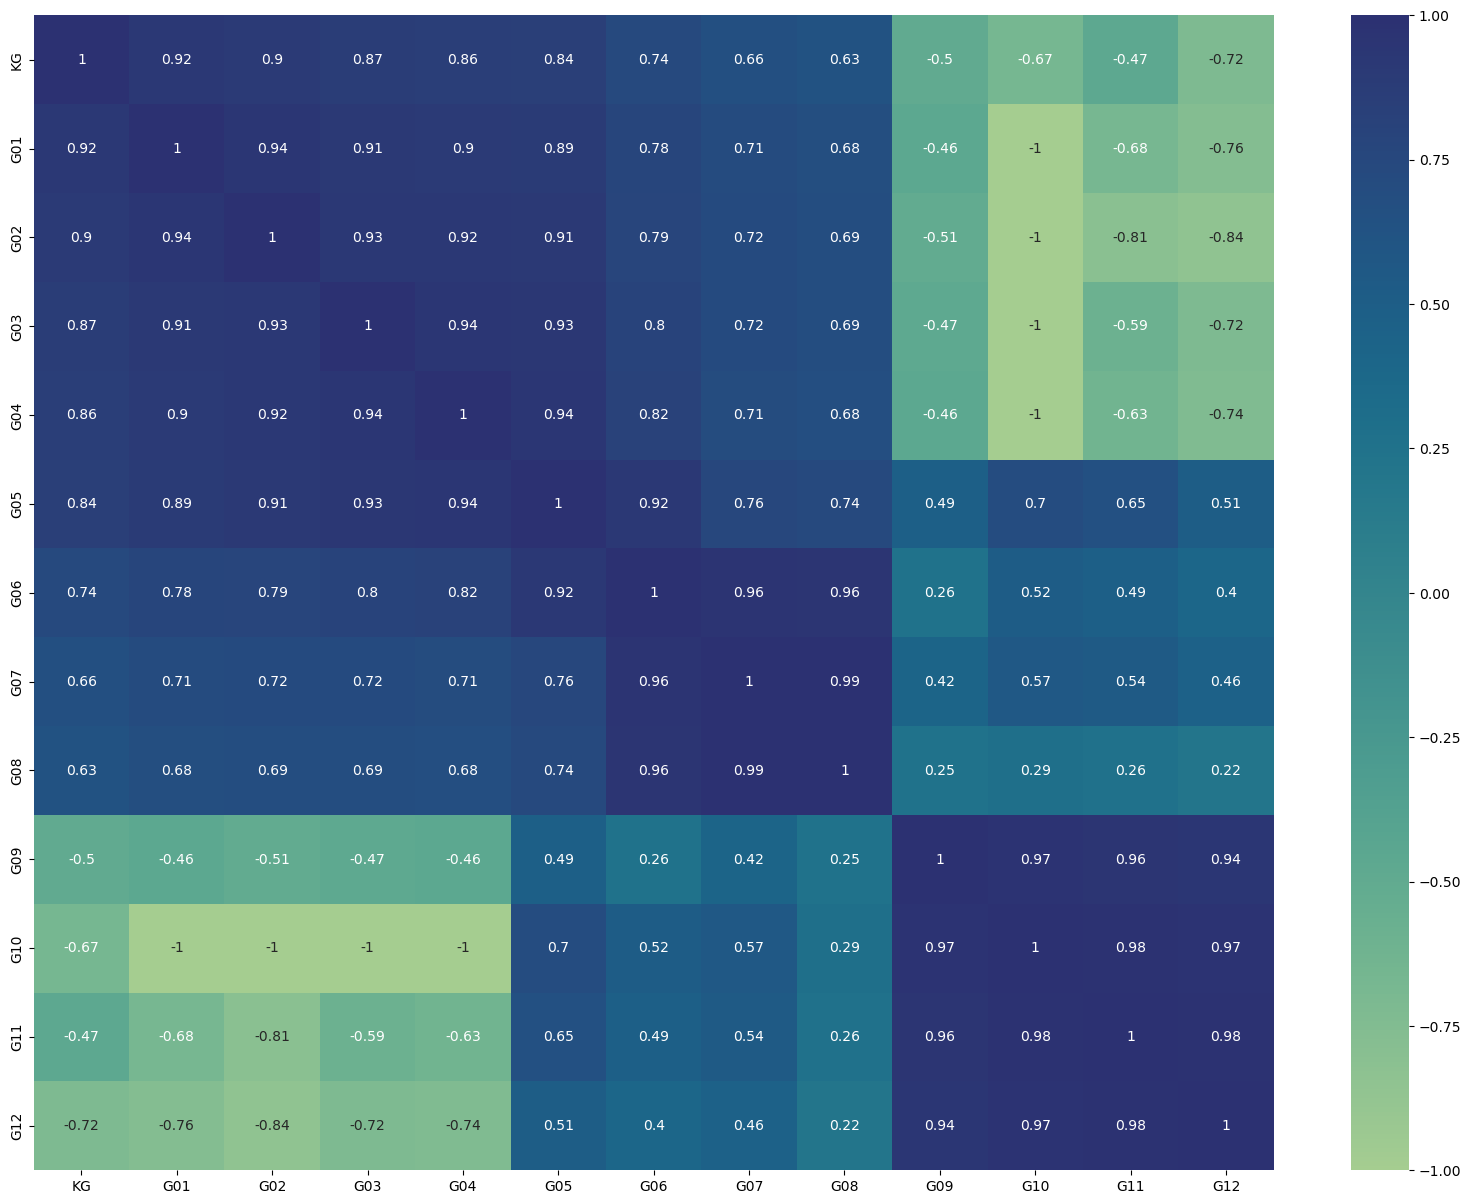

In [15]:
# Getting grades
grades = ['KG', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12']

# Dataframe for enrollment columns
df_total_enroll = pd.DataFrame()
df_total_enroll = df_cleaned[grades]

# Correlation matrix
correlation_enroll_matrix = df_total_enroll.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_enroll_matrix, annot=True,cmap='crest')
plt.show()

In [16]:
# Total Retention columns
total_ret_cols = df_cleaned.filter(like='TOT_RET_')
grade_columns = ['TOT_RET_KG','TOT_RET_G01', 'TOT_RET_G02', 'TOT_RET_G03', 'TOT_RET_G04', 'TOT_RET_G05', 'TOT_RET_G06',
                 'TOT_RET_G07', 'TOT_RET_G08', 'TOT_RET_G09', 'TOT_RET_G10', 'TOT_RET_G11', 'TOT_RET_G12']

df_total_ret = pd.DataFrame()

for grade_column in grade_columns:
    # Combine 'TOT_RET_KG_M' and 'TOT_RET_KG_F' into a new column for each grade
    if grade_column == 'TOT_RET_KG':
        grade_column_M = 'TOT_RET_KG_M'
        grade_column_F = 'TOT_RET_KG_F'
    else:
        grade_column_M = 'TOT_RET_' + grade_column[-3:] + '_M'
        grade_column_F = 'TOT_RET_' + grade_column[-3:] + '_F'
        
    df_total_ret[grade_column] = df_cleaned[grade_column_M].fillna(0) + df_cleaned[grade_column_F].fillna(0)


### Grade retention correlation

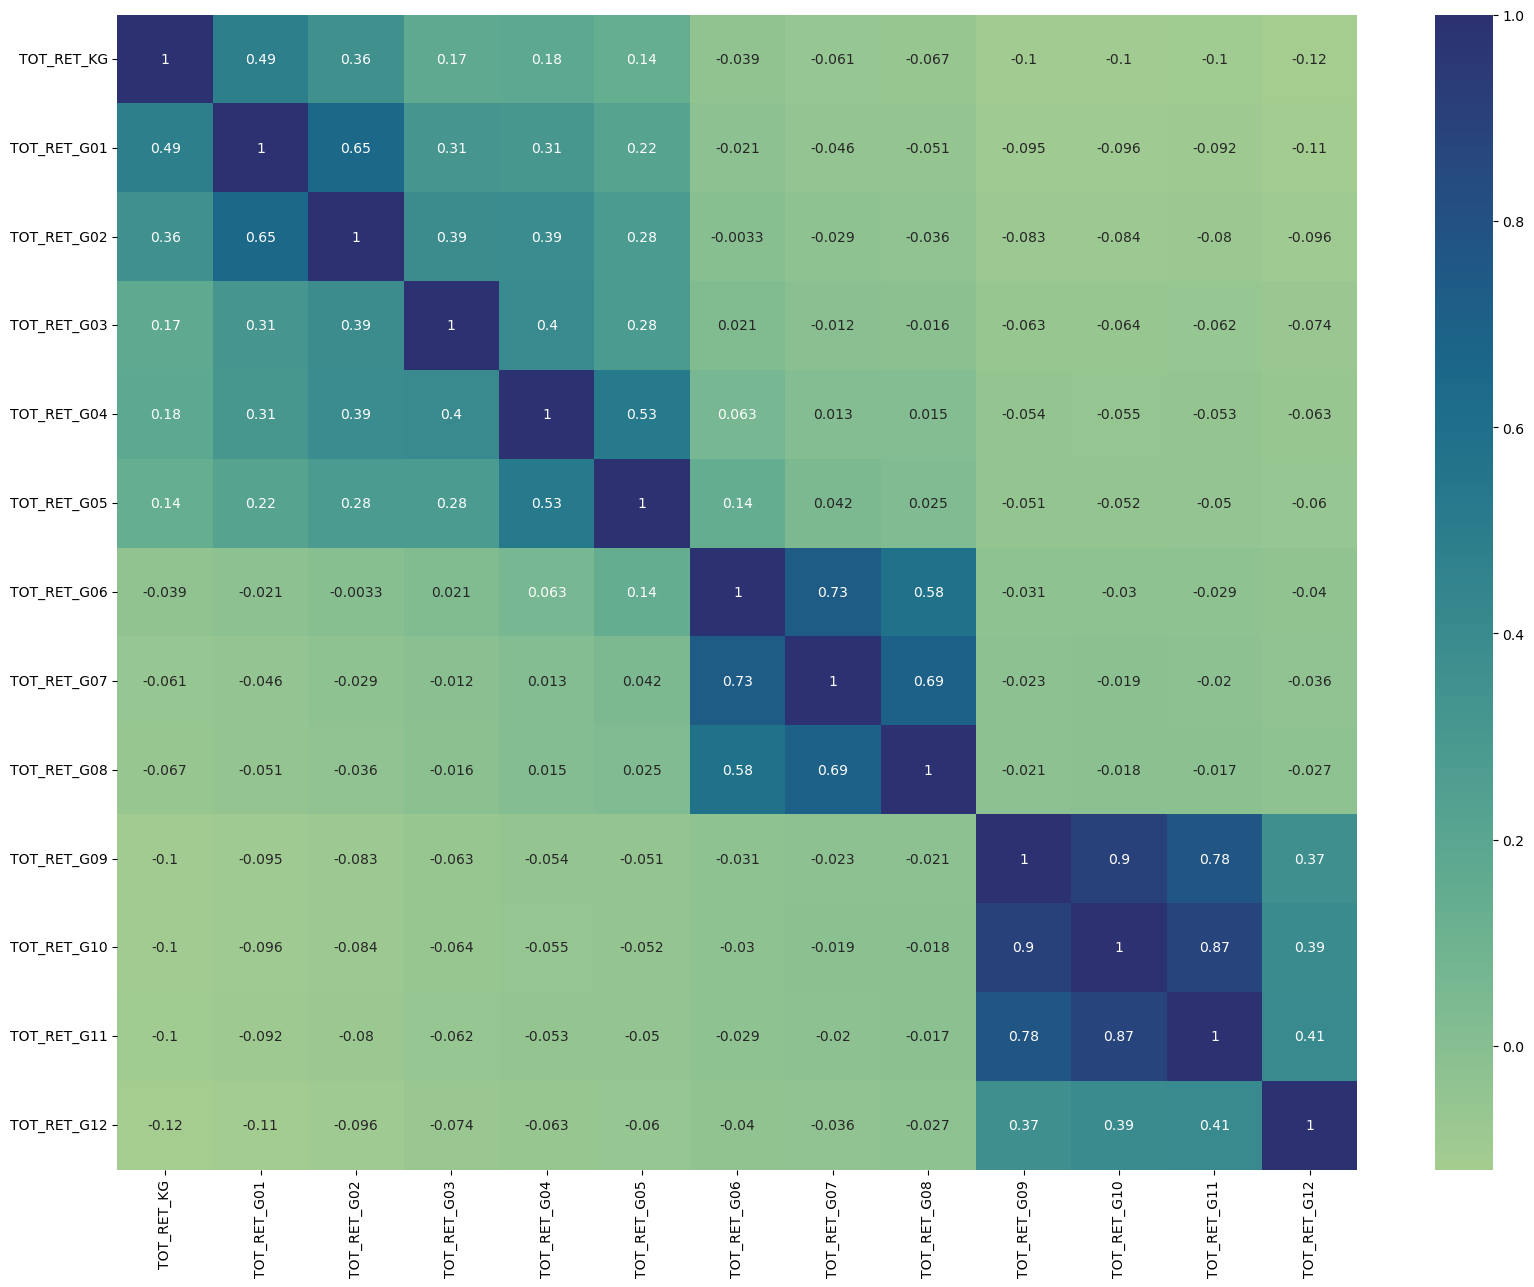

In [17]:
correlation_ret_matrix = df_total_ret.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_ret_matrix, annot=True,cmap = 'crest')
plt.show()

As can be seen from correlation graph, retention rate correlations for elementary, middle and high schools values are close to zero, which suggests they are weakly correlated.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edfebf59-8cf0-4b7e-b1cf-d80b21ef0191' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>